<a href="https://colab.research.google.com/github/KVinayReddy7/21BDS0287-EDA/blob/main/Module_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EXPLORATORY DATA ANALYSIS THEORY
#DIGITAL ASSIGNMENT

KATUKURI VINAY REDDY

21BDS0287

#MODULE-3(Correlation Analysis and Time Series Analysis)


**Univariate Analysis**

Importing and Reading the .csv file

In [1]:
import pandas as pd

# Loading the dataset from the new GitHub link
url = 'https://github.com/KVinayReddy7/21BDS0287-EDA/blob/main/credit%20card.csv?raw=true'
data = pd.read_csv(url)

data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Finding and Listing Non-Numeric Values

In [2]:
# Find and list non-numeric values in the dataset
non_numeric_count = data.select_dtypes(include=['object']).nunique()
print("Number of unique non-numeric values in each column:")
print(non_numeric_count)

# List of non-numeric values in specific columns
non_numeric_values = data.select_dtypes(include=['object']).apply(lambda col: col.unique())
print("Non-numeric values in each column:")
non_numeric_values

Number of unique non-numeric values in each column:
Personal Loan         3
Securities Account    3
CD Account            3
CreditCard            3
dtype: int64
Non-numeric values in each column:


,Personal Loan,Securities Account,CD Account,CreditCard
0,0,1,0,0
1,1,0,1,1
2,?,?,?,?


Setting Missing Values and Cleaning Specific Fields

In [3]:
# Handle missing values for 'Income' by filling with mean
data['Income'].fillna(data['Income'].mean(), inplace=True)

# Ensure 'Age' has no negative values (replace negative with 0)
data['Age'] = data['Age'].apply(lambda x: 0 if x < 0 else x)

# Display updated dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   object 
 10  Securities Account  5000 non-null   object 
 11  CD Account          5000 non-null   object 
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   object 
dtypes: float64(1), int64(9), object(4)
memory usage: 547.0+ KB


<ipython-input-3-51447f184d5a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Income'].fillna(data['Income'].mean(), inplace=True)


Distribution and Visualization

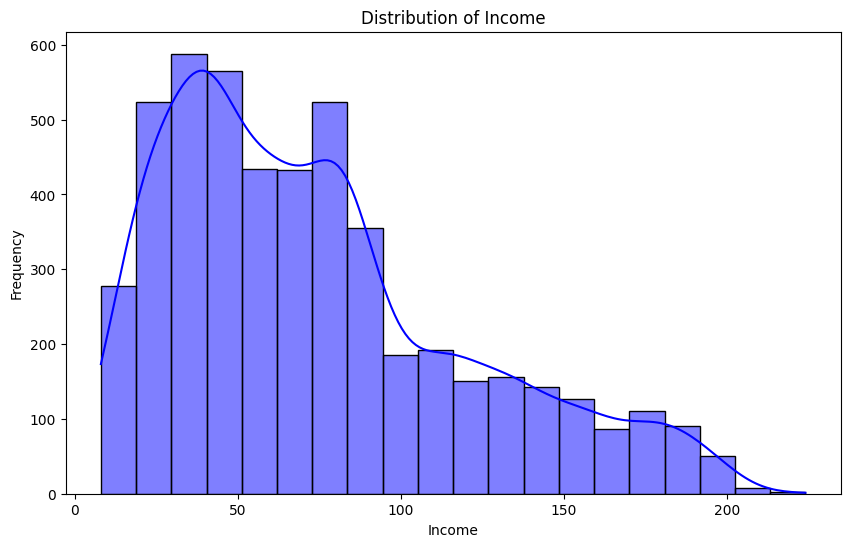

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram with KDE for 'Income'
plt.figure(figsize=(10, 6))
sns.histplot(data['Income'], bins=20, kde=True, color='blue')

# Add labels and title
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')

# Show the plot
plt.show()

Top 50 Largest Values and Visualization

<ipython-input-5-b06c5dcab664>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_50_income.index, y=top_50_income['Income'], palette='viridis')


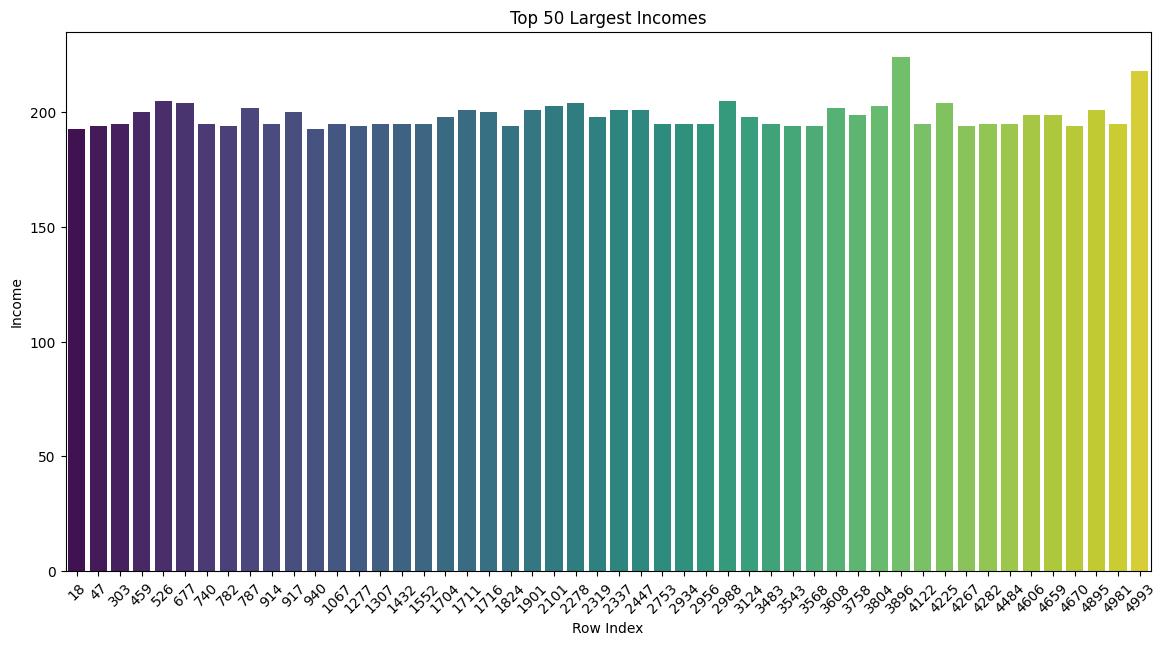

In [5]:
# Get the top 50 largest values in 'Income'
top_50_income = data.nlargest(50, 'Income')

# Create the bar plot
plt.figure(figsize=(14, 7))
sns.barplot(x=top_50_income.index, y=top_50_income['Income'], palette='viridis')

# Add labels and title
plt.title('Top 50 Largest Incomes')
plt.xlabel('Row Index')
plt.ylabel('Income')
plt.xticks(rotation=45)

# Show the plot
plt.show()

Box Plot Visualization

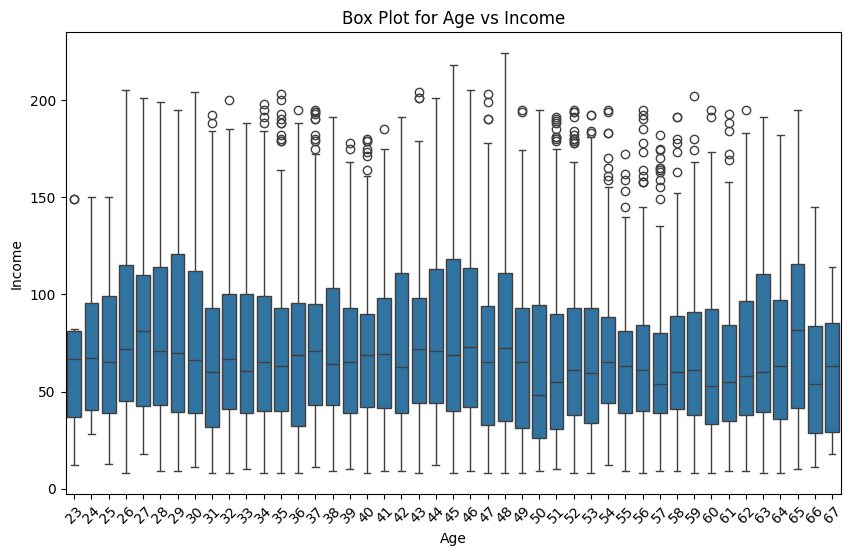

In [6]:
# Box plot for 'Age' vs 'Income'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='Income', data=data)

# Add labels and title
plt.title('Box Plot for Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.xticks(rotation=45)

# Show the plot
plt.show()

FacetGrid Visualization

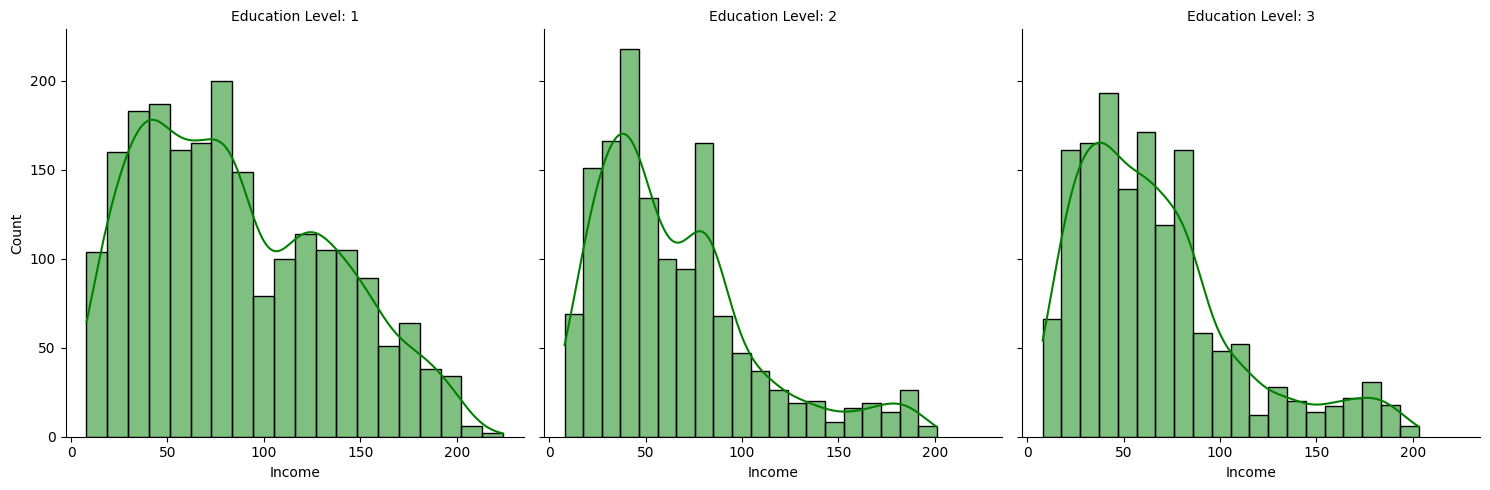

In [7]:
# Create a FacetGrid for 'Income' distribution across 'Education' levels
g = sns.FacetGrid(data, col='Education', height=5, aspect=1)
g.map(sns.histplot, 'Income', bins=20, kde=True, color='green')
g.set_titles('Education Level: {col_name}')

# Show the plot
plt.show()

#Bivariate Analysis

Scatter Plots and Correlation Analysis

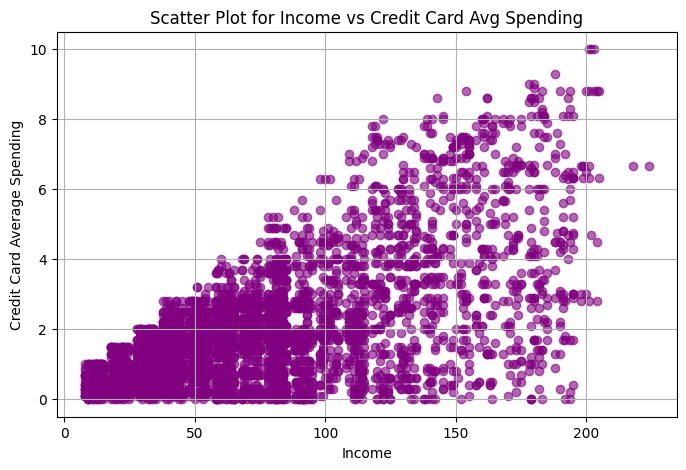

Correlation between 'Income' and 'CCAvg': 0.65
p-value: 0.00e+00


In [8]:
import scipy.stats as stats

# Scatter plot for 'Income' vs 'CCAvg'
plt.figure(figsize=(8, 5))
plt.scatter(data['Income'], data['CCAvg'], color='purple', alpha=0.6)
plt.title('Scatter Plot for Income vs Credit Card Avg Spending')
plt.xlabel('Income')
plt.ylabel('Credit Card Average Spending')
plt.grid(True)
plt.show()

# Calculate correlation between 'Income' and 'CCAvg'
corr_income_ccavg, p_value = stats.pearsonr(data['Income'], data['CCAvg'])
print(f"Correlation between 'Income' and 'CCAvg': {corr_income_ccavg:.2f}")
print(f"p-value: {p_value:.2e}")

Box Plots for Categorical and Numerical Variables

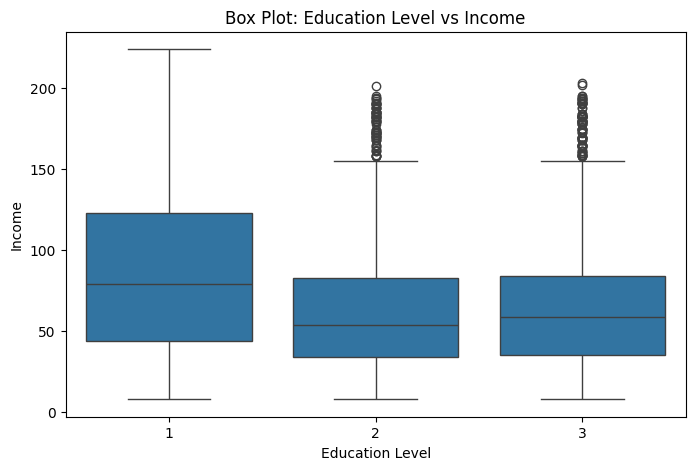

In [9]:
# Box plot for 'Education' vs 'Income'
plt.figure(figsize=(8, 5))
sns.boxplot(x='Education', y='Income', data=data)
plt.title('Box Plot: Education Level vs Income')
plt.xlabel('Education Level')
plt.ylabel('Income')
plt.show()

Heatmap for Correlation Analysis

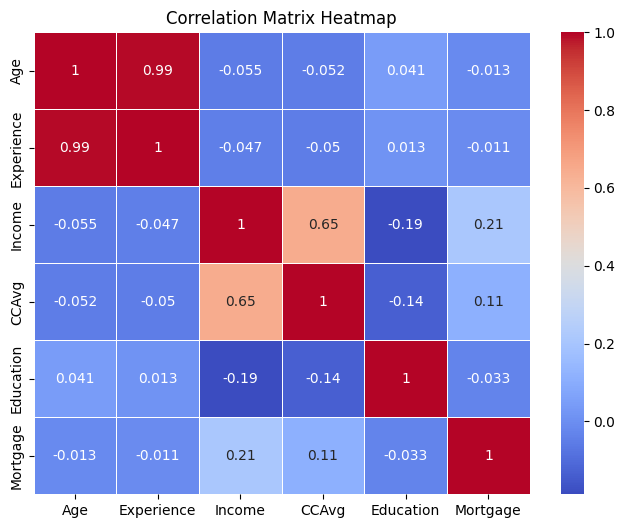

In [10]:
# Compute the correlation matrix for available numerical columns
correlation_matrix = data[['Age', 'Experience', 'Income', 'CCAvg', 'Education', 'Mortgage']].corr(method='pearson')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


#Multivariate Analysis

Pair Plot Analysis

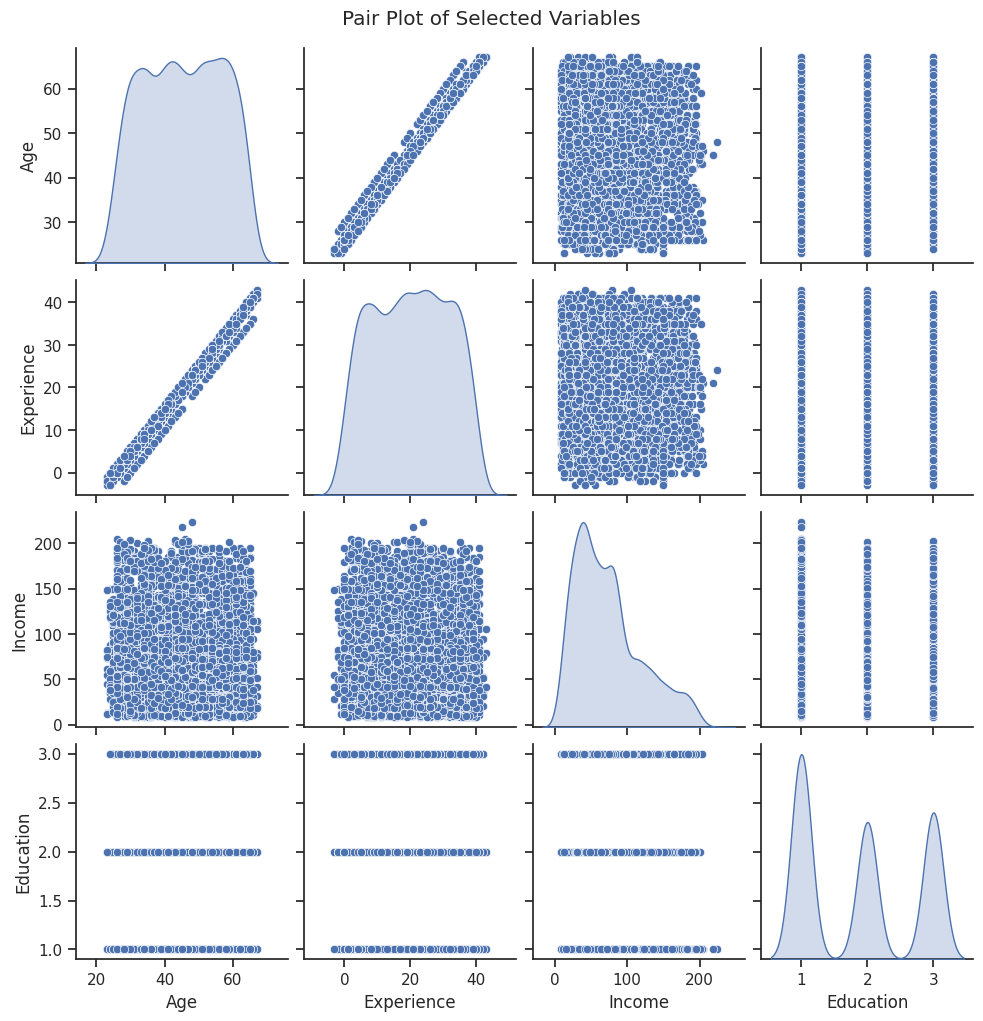

In [11]:
# Pair plot for selected numerical variables
sns.set(style='ticks', color_codes=True)
sns.pairplot(data[['Age', 'Experience', 'Income', 'Education']], diag_kind='kde')
plt.suptitle('Pair Plot of Selected Variables', y=1.02)
plt.show()

Pair Plot with Regression Lines

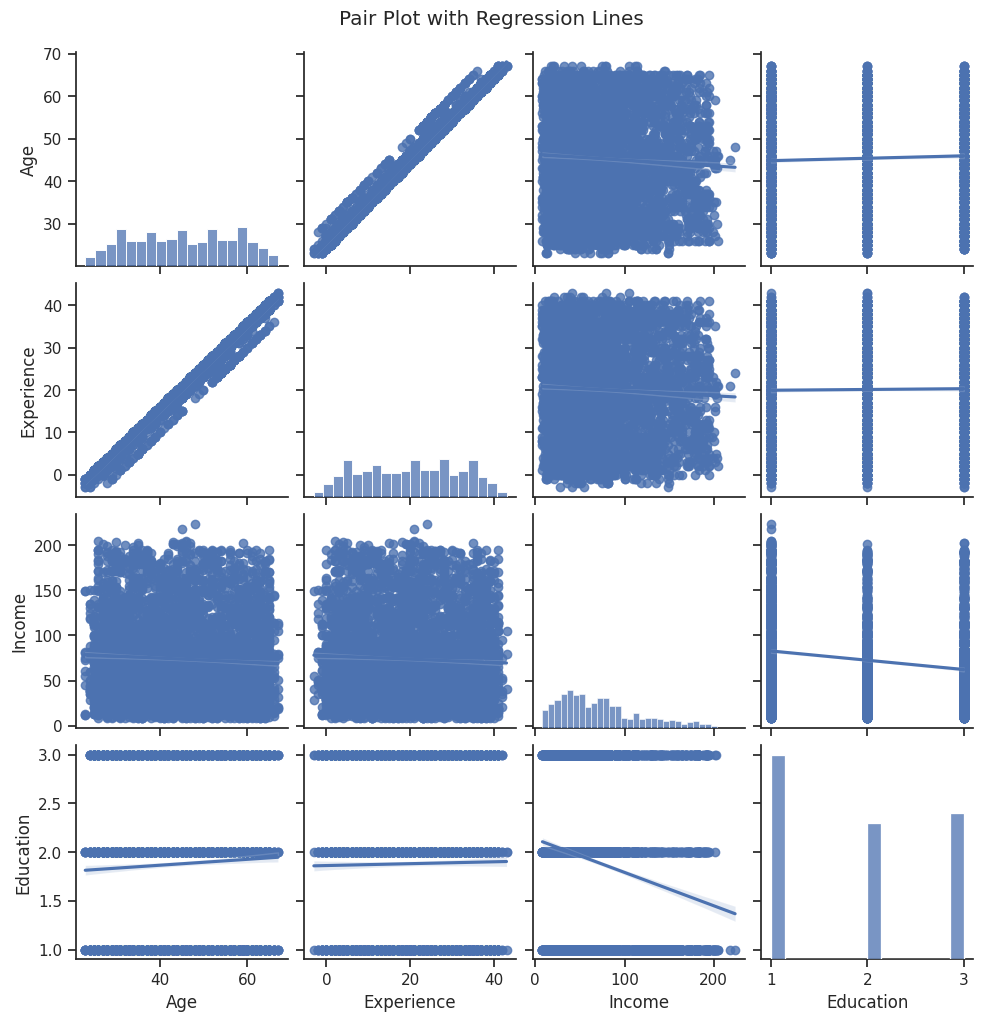

In [12]:
# Pair plot with regression lines
sns.pairplot(data, vars=['Age', 'Experience', 'Income', 'Education'], kind='reg')

# Add a title
plt.suptitle('Pair Plot with Regression Lines', y=1.02)
plt.show()


Complete Correlation Analysis

In [13]:
# Calculating correlation for numerical columns
correlation_all = data.corr(method='pearson', numeric_only=True)

# Display correlation matrix
print("Complete Correlation Matrix:")
print(correlation_all)

Complete Correlation Matrix:
                  ID       Age  Experience    Income  ZIP Code    Family  \
ID          1.000000 -0.008473   -0.008326 -0.017695  0.013432 -0.016797   
Age        -0.008473  1.000000    0.994215 -0.055269 -0.029216 -0.046418   
Experience -0.008326  0.994215    1.000000 -0.046574 -0.028626 -0.052563   
Income     -0.017695 -0.055269   -0.046574  1.000000 -0.016410 -0.157501   
ZIP Code    0.013432 -0.029216   -0.028626 -0.016410  1.000000  0.011778   
Family     -0.016797 -0.046418   -0.052563 -0.157501  0.011778  1.000000   
CCAvg      -0.024675 -0.052012   -0.050077  0.645984 -0.004061 -0.109275   
Education   0.021463  0.041334    0.013152 -0.187524 -0.017377  0.064929   
Mortgage   -0.013920 -0.012539   -0.010582  0.206806  0.007383 -0.020445   
Online     -0.002528  0.013702    0.013898  0.014206  0.016990  0.010354   

               CCAvg  Education  Mortgage    Online  
ID         -0.024675   0.021463 -0.013920 -0.002528  
Age        -0.052012   0.0

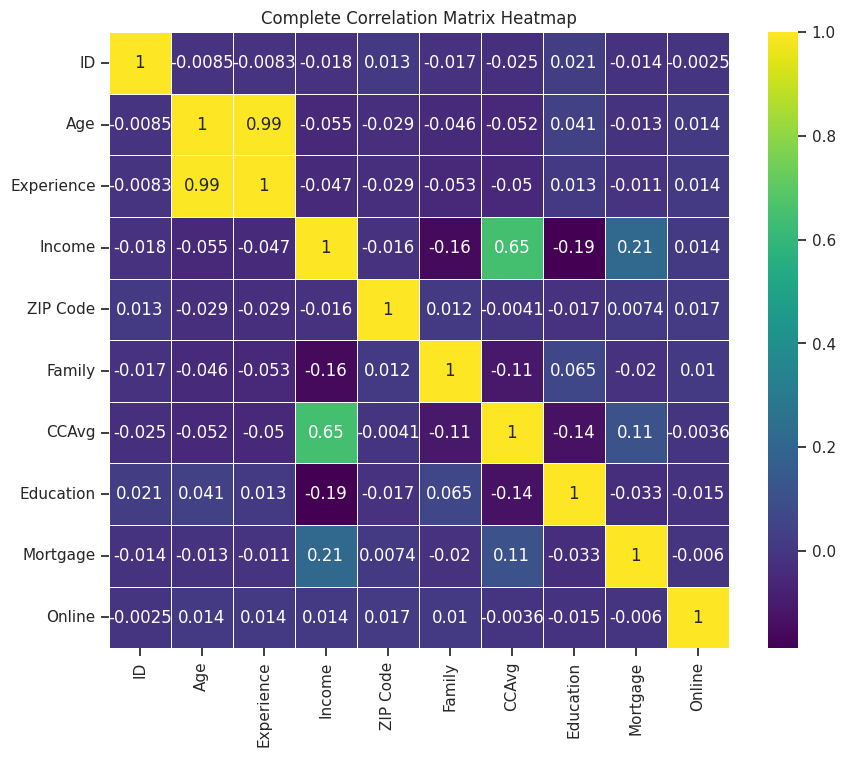

In [14]:
# Plotting heatmap for complete correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_all, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Complete Correlation Matrix Heatmap')
plt.show()

#Time Series Analysis

Creating a Synthetic Time Index

In [15]:
# Creating a synthetic time index (daily frequency starting from 2020-01-01)
data['time_index'] = pd.date_range(start='2020-01-01', periods=len(data), freq='D')

# Setting 'time_index' as the DataFrame index
data.set_index('time_index', inplace=True)

# Displaying the first few rows
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
time_index,,,,,,,,,,,,,,
2020-01-01,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2020-01-02,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2020-01-03,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
2020-01-04,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
2020-01-05,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Basic Time Series Plot

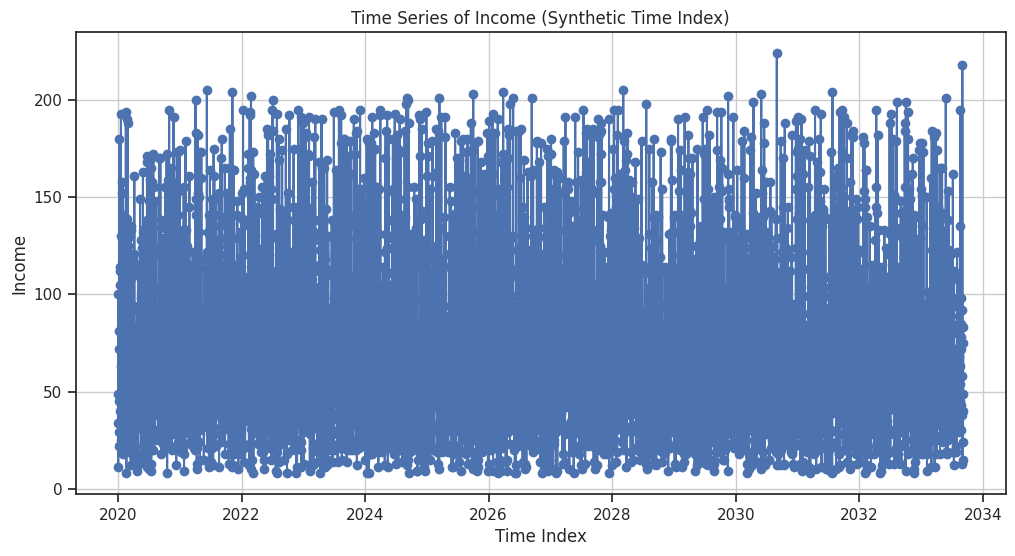

In [16]:
# Basic time series plot for 'Income'
plt.figure(figsize=(12, 6))
plt.plot(data['Income'], marker='o', linestyle='-', color='b')

# Title and labels
plt.title('Time Series of Income (Synthetic Time Index)')
plt.xlabel('Time Index')
plt.ylabel('Income')
plt.grid(True)

# Show plot
plt.show()

Resampling and Rolling Mean Analysis

<ipython-input-17-566ceac34249>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_income = data['Income'].resample('M').mean()


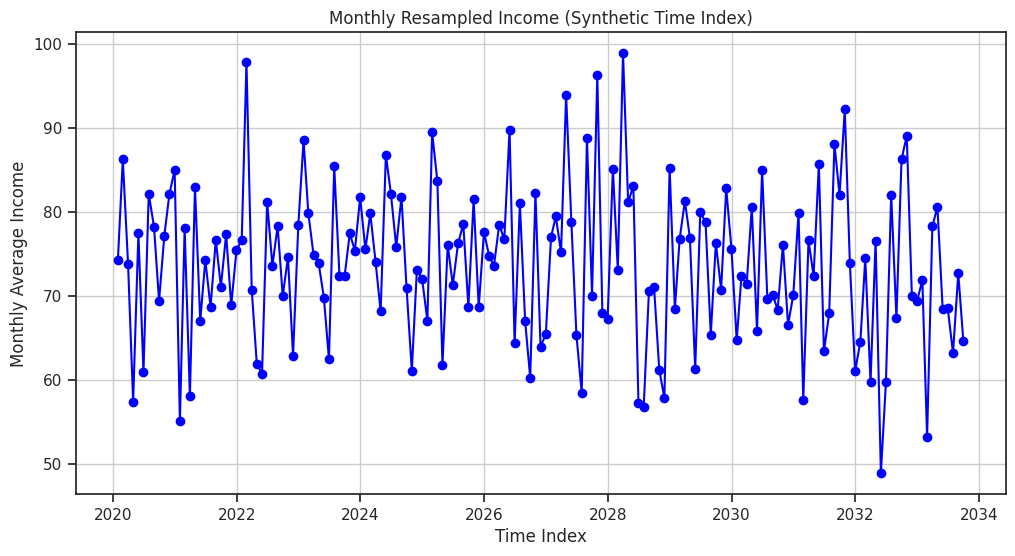

In [17]:
# Resampling the data to monthly frequency and calculating mean for 'Income'
monthly_income = data['Income'].resample('M').mean()

# Plotting the monthly resampled data
plt.figure(figsize=(12, 6))
plt.plot(monthly_income, marker='o', color='blue')

# Title and labels
plt.title('Monthly Resampled Income (Synthetic Time Index)')
plt.xlabel('Time Index')
plt.ylabel('Monthly Average Income')
plt.grid(True)

# Show plot
plt.show()

Rolling Statistics for Trend Analysis

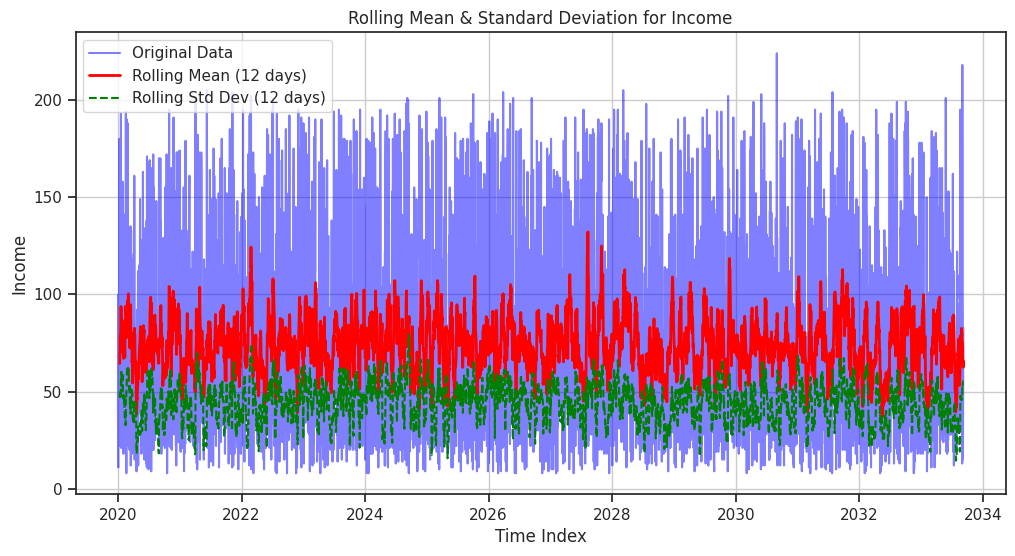

In [18]:

# Calculating rolling mean and standard deviation (12-day window)
rolling_mean = data['Income'].rolling(window=12).mean()
rolling_std = data['Income'].rolling(window=12).std()

# Plotting rolling statistics
plt.figure(figsize=(12, 6))
plt.plot(data['Income'], label='Original Data', color='blue', alpha=0.5)
plt.plot(rolling_mean, label='Rolling Mean (12 days)', color='red', linewidth=2)
plt.plot(rolling_std, label='Rolling Std Dev (12 days)', color='green', linestyle='dashed')

# Title and labels
plt.title('Rolling Mean & Standard Deviation for Income')
plt.xlabel('Time Index')
plt.ylabel('Income')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


Seasonal Decomposition

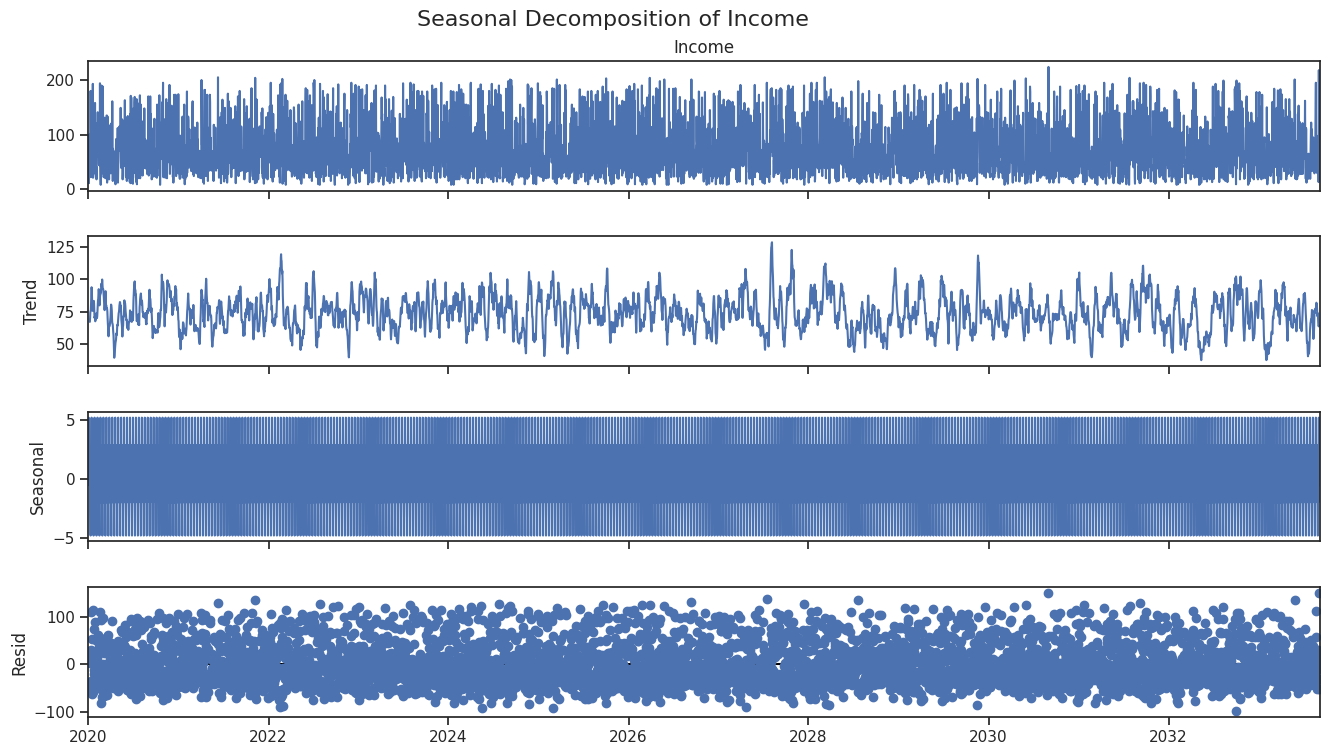

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Perform seasonal decomposition on 'Income' (additive model)
decomposition = seasonal_decompose(data['Income'], model='additive', period=12)

# Plot the decomposition results
fig = decomposition.plot()
fig.set_size_inches(15, 8)
plt.suptitle('Seasonal Decomposition of Income', fontsize=16)
plt.show()